q2 part3
#'Data preprocessing'

In [6]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From (original): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
From (redirected): https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW&confirm=t&uuid=e514c3af-d61a-46dd-ac80-697fdcac778e
To: /content/train_data.csv
100% 635M/635M [00:03<00:00, 188MB/s]


In [ ]:
!gdown 1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB

Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100% 15.6M/15.6M [00:00<00:00, 77.5MB/s]


In [7]:
traindf = pd.read_csv("/content/train_data.csv")

<ipython-input-7-5e4155aca592>:1: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
testdf = pd.read_csv("/content/test_data.csv")

- text preprocessing

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
# from spellchecker import SpellChecker
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import string
import nltk
import re

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def text_preprocesser(review):

    url_mention_pattern = r"(?:\@|https?\://)\S+"
    slash = r'\\'
    enter = r'\n'
    non_ASCII = r'[^\x00-\x7f]'
    custom_chars = r'\Ã\±\ã\¼\â\»\§'

    unwanteds_pattern = [url_mention_pattern, custom_chars, non_ASCII, enter, slash]

    for pattern in unwanteds_pattern:
        review = re.sub(pattern, "", review)

    review = re.sub(r"\d+", "<NUMBER>", review)
    review = review.lower()

    verbs = "wouldn't wouldn't won't will weren't weren were wasn't wasn was shouldn't shouldn should've should needn't mustn't mustn mightn it's is isn isn isn't have haven't haven having has hasn hasn't hasn had hadn't hadn been can couldn couldn did didn didn't do does doesn't does doin doing don don't are aren aren't"
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.difference(set(verbs.split(" ")))

    punctuation = set(string.punctuation)
    review = review.lower()

    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(review)
    words = [word for word in words if word not in stop_words and word not in punctuation]

    # spell = SpellChecker()
    # words = [spell.correction(word) for word in words]

    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) if word is not None else '' for word in words]

    return words

In [ ]:
traindf['prep'] = traindf['reviewText'].apply(text_preprocesser)

In [ ]:
max_sequence_length = 100
max_vocab_size = 1000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(traindf['reviewText'])

In [ ]:
traindf['prep'] = tokenizer.texts_to_sequences(traindf['prep'])

In [ ]:
newtrain = traindf[['prep', 'overall']]

In [ ]:
newtrain.to_csv("newtrain.csv", index=False)

- Balancing Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
newtrain = pd.read_csv('/content/newtrain.csv')

In [ ]:
max_len  = 100

X = pad_sequences(newtrain['prep'].tolist(), padding="post", maxlen=max_len)

In [ ]:
newtrain['overall'].value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

<Axes: >

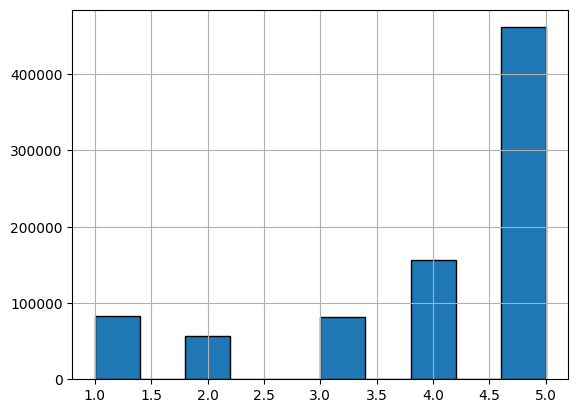

In [ ]:
newtrain['overall'].hist(edgecolor="black", align='mid')

**for balancing the data i gonna try tree way:**
- **Under sampling + Over sampling**
- **Under sampling + SMOTE**
- **Under sampling**

Under sampling + Over sampling

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 90000, 5: 90000}, random_state=42)
oversampler = RandomOverSampler(sampling_strategy={1: 90000, 2: 90000, 3: 90000, 4: 90000, 5: 90000}, random_state=42)

Xrs, yrs = undersampler.fit_resample(X , newtrain['overall'])
Xuo, yuo = oversampler.fit_resample(Xrs, yrs)

In [ ]:
yuo.value_counts()

overall
1    90000
2    90000
3    90000
4    90000
5    90000
Name: count, dtype: int64

In [ ]:
yuo_encoded = to_categorical(yuo-1)

Under sampling + SMOTE

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy={1: 82950, 2: 56756, 3: 81239, 4: 90000, 5: 90000}, random_state=42)
smote = SMOTE(sampling_strategy={1: 90000, 2: 90000, 3: 90000, 4: 90000, 5: 90000}, random_state=42)

Xrs, yrs = undersampler.fit_resample(X, newtrain['overall'])
Xus, yus = smote.fit_resample(Xrs, yrs)

In [ ]:
yus.value_counts()

overall
1    90000
2    90000
3    90000
4    90000
5    90000
Name: count, dtype: int64

In [ ]:
yus_encoded = to_categorical(yus-1)

Under sampling

In [ ]:
undersampler = RandomUnderSampler(random_state=42)

Xu, yu = undersampler.fit_resample(X, newtrain['overall'])

In [ ]:
yu.value_counts()

overall
1    56756
2    56756
3    56756
4    56756
5    56756
Name: count, dtype: int64

In [ ]:
yu_encoded = to_categorical(yu-1)

# Base Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score

testing Under sampling + Over sampling data

In [ ]:
X_train_UO, X_val_UO, y_train_UO, y_val_UO = train_test_split(Xuo, yuo_encoded, test_size=0.22, random_state=42)

In [ ]:
model_1 = Sequential()
model_1.add(Embedding(input_dim=1000, output_dim=64, input_length=100))
model_1.add(LSTM(128, return_sequences=True, kernel_regularizer=regularizers.L2(1e-4)))
model_1.add(Dropout(0.2))
model_1.add(LSTM(256, kernel_regularizer=regularizers.L2(1e-4)))
model_1.add(Dropout(0.3))
model_1.add(Dense(5, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100, 128)          98816     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                                 
Total params: 558341 (2.13 MB)
Trainable params: 558341 

In [ ]:
history_UO = model_1.fit(X_train_UO, y_train_UO,
          validation_split=0.15,
          epochs=10,
          batch_size=128)


Epoch 1/10
2331/2331 [==============================] - 61s 26ms/step - loss: 1.6108 - accuracy: 0.2004 - val_loss: 1.6097 - val_accuracy: 0.2006
Epoch 2/10
2331/2331 [==============================] - 62s 27ms/step - loss: 1.6140 - accuracy: 0.1997 - val_loss: 1.6124 - val_accuracy: 0.2002
Epoch 3/10
2331/2331 [==============================] - 58s 25ms/step - loss: 1.6115 - accuracy: 0.2008 - val_loss: 1.6104 - val_accuracy: 0.2002
Epoch 4/10
2331/2331 [==============================] - 63s 27ms/step - loss: 1.6105 - accuracy: 0.1991 - val_loss: 1.6100 - val_accuracy: 0.2007
Epoch 5/10
2331/2331 [==============================] - 60s 26ms/step - loss: 1.6101 - accuracy: 0.1992 - val_loss: 1.6096 - val_accuracy: 0.2002
Epoch 6/10
2331/2331 [==============================] - 60s 26ms/step - loss: 1.6099 - accuracy: 0.1994 - val_loss: 1.6097 - val_accuracy: 0.2007
Epoch 7/10
2331/2331 [==============================] - 63s 27ms/step - loss: 1.6100 - accuracy: 0.2010 - val_loss: 1.6100 -

In [ ]:
score_uo = model_1.evaluate(X_val_UO, y_val_UO, verbose=1)

y_pred_uo = model_1.predict(X_val_UO, verbose=1)
y_pred_uo_arg = np.argmax(y_pred_uo, axis=1)
original_y = np.argmax(y_val_UO+1, axis=1)

f1 = f1_score(original_y, y_pred_uo_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

3094/3094 [==============================] - 25s 8ms/step
F1 Score: 0.20


testing Under sampling + SMOTE data

In [ ]:
X_train_US, X_val_US, y_train_US, y_val_US = train_test_split(Xus, yus_encoded, test_size=0.22, random_state=42)

In [ ]:
history_US = model_1.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=128)


Epoch 1/10
2331/2331 [==============================] - 89s 38ms/step - loss: 1.6097 - accuracy: 0.2005 - val_loss: 1.6096 - val_accuracy: 0.1990
Epoch 2/10
2331/2331 [==============================] - 64s 27ms/step - loss: 1.6097 - accuracy: 0.1997 - val_loss: 1.6095 - val_accuracy: 0.2007
Epoch 3/10
2331/2331 [==============================] - 60s 26ms/step - loss: 1.6097 - accuracy: 0.1994 - val_loss: 1.6095 - val_accuracy: 0.2007
Epoch 4/10
2331/2331 [==============================] - 62s 27ms/step - loss: 1.6096 - accuracy: 0.2001 - val_loss: 1.6096 - val_accuracy: 0.1995
Epoch 5/10
2331/2331 [==============================] - 60s 26ms/step - loss: 1.6097 - accuracy: 0.2006 - val_loss: 1.6095 - val_accuracy: 0.2002
Epoch 6/10
2331/2331 [==============================] - 63s 27ms/step - loss: 1.5754 - accuracy: 0.2368 - val_loss: 1.3608 - val_accuracy: 0.4039
Epoch 7/10
2331/2331 [==============================] - 60s 26ms/step - loss: 1.2447 - accuracy: 0.4737 - val_loss: 1.1812 -

In [ ]:
score_us = model_1.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_us = model_1.predict(X_val_US, verbose=1)
y_pred_us_arg = np.argmax(y_pred_us, axis=1)
original_y = np.argmax(y_val_US+1, axis=1)

f1 = f1_score(original_y, y_pred_us_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

3094/3094 [==============================] - 22s 7ms/step
F1 Score: 0.52


testing Under sampling only data

In [ ]:
X_train_U, X_val_U, y_train_U, y_val_U = train_test_split(Xu, yu_encoded, test_size=0.22, random_state=42)

In [ ]:
history_U = model_1.fit(X_train_U, y_train_U,
          validation_split=0.15,
          epochs=10,
          batch_size=128)


Epoch 1/10
1470/1470 [==============================] - 37s 25ms/step - loss: 1.1970 - accuracy: 0.4854 - val_loss: 1.1914 - val_accuracy: 0.4876
Epoch 2/10
1470/1470 [==============================] - 41s 28ms/step - loss: 1.1848 - accuracy: 0.4902 - val_loss: 1.1898 - val_accuracy: 0.4856
Epoch 3/10
1470/1470 [==============================] - 38s 26ms/step - loss: 1.1759 - accuracy: 0.4955 - val_loss: 1.1898 - val_accuracy: 0.4860
Epoch 4/10
1470/1470 [==============================] - 41s 28ms/step - loss: 1.1680 - accuracy: 0.5000 - val_loss: 1.1848 - val_accuracy: 0.4899
Epoch 5/10
1470/1470 [==============================] - 38s 26ms/step - loss: 1.1608 - accuracy: 0.5029 - val_loss: 1.1839 - val_accuracy: 0.4904
Epoch 6/10
1470/1470 [==============================] - 43s 29ms/step - loss: 1.1539 - accuracy: 0.5058 - val_loss: 1.1929 - val_accuracy: 0.4879
Epoch 7/10
1470/1470 [==============================] - 39s 26ms/step - loss: 1.1466 - accuracy: 0.5090 - val_loss: 1.1848 -

In [ ]:
score_u = model_1.evaluate(X_val_U, y_val_U, verbose=1)

y_pred_u = model_1.predict(X_val_U, verbose=1)
y_pred_u_arg = np.argmax(y_pred_u, axis=1)
original_y = np.argmax(y_val_U+1, axis=1)

f1 = f1_score(original_y, y_pred_u_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

1951/1951 [==============================] - 12s 6ms/step
F1 Score: 0.49


secound base model

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_2.add(LSTM(256))
model_2.add(Dropout(0.1))
model_2.add(Dense(5, activation = "sigmoid"))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_3 (LSTM)               (None, 256)               328704    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 393989 (1.50 MB)
Trainable params: 393989 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2_US = model_2.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=64)

Epoch 1/10
4662/4662 [==============================] - 71s 15ms/step - loss: 1.1889 - accuracy: 0.4998 - val_loss: 1.1604 - val_accuracy: 0.5139
Epoch 2/10
4662/4662 [==============================] - 69s 15ms/step - loss: 1.1522 - accuracy: 0.5162 - val_loss: 1.1519 - val_accuracy: 0.5124
Epoch 3/10
4662/4662 [==============================] - 66s 14ms/step - loss: 1.1294 - accuracy: 0.5267 - val_loss: 1.1270 - val_accuracy: 0.5273
Epoch 4/10
4662/4662 [==============================] - 62s 13ms/step - loss: 1.1067 - accuracy: 0.5365 - val_loss: 1.1151 - val_accuracy: 0.5328
Epoch 5/10
4662/4662 [==============================] - 66s 14ms/step - loss: 1.0862 - accuracy: 0.5457 - val_loss: 1.1119 - val_accuracy: 0.5361
Epoch 6/10
4662/4662 [==============================] - 65s 14ms/step - loss: 1.0661 - accuracy: 0.5541 - val_loss: 1.1008 - val_accuracy: 0.5400
Epoch 7/10
4662/4662 [==============================] - 68s 15ms/step - loss: 1.0446 - accuracy: 0.5632 - val_loss: 1.1045 -

In [ ]:
score_2_us = model_2.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_2_us = model_2.predict(X_val_US, verbose=1)
y_pred_2_us_arg = np.argmax(y_pred_2_us, axis=1)
original_y = np.argmax(y_val_US+1, axis=1)

f1 = f1_score(original_y, y_pred_2_us_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

3094/3094 [==============================] - 16s 5ms/step
F1 Score: 0.54


third base model

In [ ]:
model_3 = Sequential()
model_3.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_3.add(LSTM(256))
model_3.add(Dropout(0.1))
model_3.add(Dense(5, activation = "sigmoid"))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_4 (LSTM)               (None, 256)               328704    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 393989 (1.50 MB)
Trainable params: 393989 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history3 = model_3.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=256)

Epoch 1/10
1166/1166 [==============================] - 54s 43ms/step - loss: 1.4408 - accuracy: 0.3246 - val_loss: 1.2893 - val_accuracy: 0.4429
Epoch 2/10
1166/1166 [==============================] - 33s 28ms/step - loss: 1.4394 - accuracy: 0.3446 - val_loss: 1.5338 - val_accuracy: 0.2688
Epoch 3/10
1166/1166 [==============================] - 33s 28ms/step - loss: 1.5045 - accuracy: 0.2894 - val_loss: 1.3313 - val_accuracy: 0.4112
Epoch 4/10
1166/1166 [==============================] - 32s 27ms/step - loss: 1.2590 - accuracy: 0.4563 - val_loss: 1.1934 - val_accuracy: 0.4984
Epoch 5/10
1166/1166 [==============================] - 32s 27ms/step - loss: 1.1868 - accuracy: 0.5014 - val_loss: 1.1747 - val_accuracy: 0.5055
Epoch 6/10
1166/1166 [==============================] - 33s 28ms/step - loss: 1.1667 - accuracy: 0.5103 - val_loss: 1.1542 - val_accuracy: 0.5132
Epoch 7/10
1166/1166 [==============================] - 32s 27ms/step - loss: 1.1483 - accuracy: 0.5188 - val_loss: 1.1448 -

In [ ]:
score_3_us = model_3.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_3_us = model_3.predict(X_val_US, verbose=1)
y_pred_3_us_arg = np.argmax(y_pred__us, axis=1)
original_y = np.argmax(y_val_US+1, axis=1)

f1 = f1_score(original_y, y_pred_3_us_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

3094/3094 [==============================] - 18s 5ms/step
F1 Score: 0.53


fourth base model

In [ ]:
model_4 = Sequential()
model_4.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_4.add(LSTM(128, return_sequences=True))
model_4.add(Dropout(0.1))
model_4.add(LSTM(256))
model_4.add(Dropout(0.2))
model_4.add(Dense(5, activation='softmax'))

model_4.compile(optimizer=tf.keras.optimizers.AdamW(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_4 (LSTM)               (None, 100, 128)          98816     
                                                                 
 dropout_4 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 558341 (2.13 MB)
Trainable params: 55834

In [ ]:
history4 = model_4.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=10,
          batch_size=256)


Epoch 1/10
1166/1166 [==============================] - 58s 47ms/step - loss: 1.3927 - accuracy: 0.3637 - val_loss: 1.2804 - val_accuracy: 0.4406
Epoch 2/10
1166/1166 [==============================] - 44s 38ms/step - loss: 1.2655 - accuracy: 0.4579 - val_loss: 1.2147 - val_accuracy: 0.4927
Epoch 3/10
1166/1166 [==============================] - 44s 38ms/step - loss: 1.2059 - accuracy: 0.4958 - val_loss: 1.1806 - val_accuracy: 0.5055
Epoch 4/10
1166/1166 [==============================] - 44s 38ms/step - loss: 1.1756 - accuracy: 0.5066 - val_loss: 1.1599 - val_accuracy: 0.5106
Epoch 5/10
1166/1166 [==============================] - 46s 40ms/step - loss: 1.1628 - accuracy: 0.5114 - val_loss: 1.1598 - val_accuracy: 0.5136
Epoch 6/10
1166/1166 [==============================] - 44s 38ms/step - loss: 1.1428 - accuracy: 0.5204 - val_loss: 1.1393 - val_accuracy: 0.5187
Epoch 7/10
1166/1166 [==============================] - 46s 40ms/step - loss: 1.1278 - accuracy: 0.5276 - val_loss: 1.1268 -

In [ ]:
score_4_us = model_4.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_4_us = model_4.predict(X_val_US, verbose=1)
y_pred_4_us_arg = np.argmax(y_pred_4_us, axis=1)
original_y = np.argmax(y_val_US+1, axis=1)

f1 = f1_score(original_y, y_pred_4_us_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

3094/3094 [==============================] - 15s 5ms/step
F1 Score: 0.54


fifth base model

In [ ]:
model_5 = Sequential()
model_5.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_5.add(LSTM(256, kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_5.add(Dropout(0.1))
model_5.add(Dense(5, activation='softmax'))

model_5.compile(optimizer=tf.keras.optimizers.AdamW(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_3 (LSTM)               (None, 256)               328704    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 393989 (1.50 MB)
Trainable params: 393989 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history5 = model_5.fit(X_train_US, y_train_US,
          validation_split=0.15,
          epochs=20,
          batch_size=256)


Epoch 1/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.0988 - accuracy: 0.5428 - val_loss: 1.1186 - val_accuracy: 0.5351
Epoch 2/20
1166/1166 [==============================] - 29s 25ms/step - loss: 1.0952 - accuracy: 0.5445 - val_loss: 1.1245 - val_accuracy: 0.5334
Epoch 3/20
1166/1166 [==============================] - 30s 25ms/step - loss: 1.0911 - accuracy: 0.5463 - val_loss: 1.1222 - val_accuracy: 0.5339
Epoch 4/20
1166/1166 [==============================] - 30s 25ms/step - loss: 1.0882 - accuracy: 0.5476 - val_loss: 1.1190 - val_accuracy: 0.5340
Epoch 5/20
1166/1166 [==============================] - 29s 25ms/step - loss: 1.0836 - accuracy: 0.5500 - val_loss: 1.1195 - val_accuracy: 0.5347
Epoch 6/20
1166/1166 [==============================] - 30s 26ms/step - loss: 1.0805 - accuracy: 0.5515 - val_loss: 1.1300 - val_accuracy: 0.5289
Epoch 7/20
1166/1166 [==============================] - 29s 25ms/step - loss: 1.0764 - accuracy: 0.5534 - val_loss: 1.1209 -

In [ ]:
score_5_us = model_5.evaluate(X_val_US, y_val_US, verbose=1)

y_pred_5_us = model_5.predict(X_val_US, verbose=1)
y_pred_5_us_arg = np.argmax(y_pred_5_us, axis=1)
original_y = np.argmax(y_val_US+1, axis=1)

f1 = f1_score(original_y, y_pred_5_us_arg, average='micro')
print(f'F1 Score: {f1:.2f}')

3094/3094 [==============================] - 12s 4ms/step
F1 Score: 0.54


# Pre-trained Model

In [1]:
import transformers

In [2]:
import tensorflow as tf
import pandas as pd
import json
import gc

In [ ]:
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

In [4]:
from tqdm import tqdm

In [5]:
nltk.download('stopwords')
stopw = stopwords.words('english')

NameError: name 'nltk' is not defined

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(traindf['prep'], traindf['overall'], test_size = 0.2, random_state = 42 )

train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 42 )

In [ ]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )
val_encodings = tokenizer(val_texts, truncation = True, padding = True )

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

Fine-tuning with the TFTrainer class

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

In [ ]:
training_args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=7,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=1e-5,
    logging_dir='./logs',
    eval_steps=100
)

with training_args.strategy.scope():
    trainer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 5 )


trainer = TFTrainer(
    model=trainer_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

Saving the model


In [ ]:
save_directory = "/saved_models"
model.save_pretrained(save_directory)
toknizer.save_pretrained(save_directory)

Loading Pre-Trained Model


In [ ]:
tokenizer_fine_tuned = DistilBertTokenizer.from_pretrained(save_directory)
model_fine_tuned = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

In [ ]:
predict_input = tokenizer_fine_tuned.encode(
    test_text,
    truncation = True,
    padding = True,
    return_tensors = 'tf'
)

output = model_fine_tuned(predict_input)[0]

prediction_value = tf.argmax(output, axis = 1).numpy()[0]

prediction_value